<class 'pandas.core.panel.Panel'>
Dimensions: 1 (items) x 6329 (major_axis) x 5 (minor_axis)
Items axis: SPY to SPY
Major_axis axis: 1993-01-29 00:00:00+00:00 to 2018-03-16 00:00:00+00:00
Minor_axis axis: open to volume


In [2]:
from zipline.api import order, record, symbol, set_benchmark
import zipline
from datetime import datetime
import pandas as pd
from collections import OrderedDict
import pytz


def initialize(context):
    set_benchmark(symbol("SPY"))
    
def handle_data(context, data):
    order(symbol("SPY"), 10)
    record(SPY=data.current(symbol('SPY'), 'price'))
    
data = OrderedDict()
tickers = ["SPY"]
 
for ticker in tickers:
    data[ticker] = pd.read_csv("{}.csv".format(ticker), index_col=0, parse_dates=['date'])
    data[ticker] = data[ticker][["open","high","low","close","volume"]]
print(data)

panel = pd.Panel(data)
panel.minor_axis = "open","high","low","close","volume"
panel.major_axis = panel.major_axis.tz_localize(pytz.utc)
print(panel)

perf = zipline.run_algorithm(start=datetime(2017, 1, 5, 0, 0, 0, 0, pytz.utc),
                              end=datetime(2018, 3, 1, 0, 0, 0, 0, pytz.utc),
                              initialize=initialize,
                              capital_base=100000,
                              handle_data=handle_data,
                              data=panel)

OrderedDict([('SPY',                   open        high         low       close     volume
date                                                                 
1993-01-29   43.968700   43.968700   43.750000   43.937500    1003200
1993-02-01   43.968700   44.250000   43.968700   44.250000     480500
1993-02-02   44.218700   44.375000   44.125000   44.343700     201300
1993-02-03   44.406200   44.843700   44.375000   44.812500     529400
1993-02-04   44.968700   45.093700   44.468700   45.000000     531500
1993-02-05   44.968700   45.062500   44.718700   44.968700     492100
1993-02-08   44.968700   45.125000   44.906200   44.968700     596100
1993-02-09   44.812500   44.812500   44.562500   44.656200     122100
1993-02-10   44.656200   44.750000   44.531200   44.718700     379600
1993-02-11   44.781200   45.125000   44.781200   44.937500      19500
1993-02-12   44.875000   44.875000   44.593700   44.593700      42500
1993-02-16   44.468700   44.468700   43.406200   43.468700     374800

In [27]:
perf.head()

,SPY,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-01-05 21:00:00+00:00,226.399994,NaN,0.000000,NaN,-0.000794,NaN,NaN,0.00000,100000.00000,0.00000,...,0.0,0.0,0,NaN,100000.00000,0.00000,0.00000,1,[],0.0
2017-01-06 21:00:00+00:00,227.210007,0.000129,-0.000011,-0.000525,0.002780,0.049077,-0.002621,-2273.24612,97726.75388,2272.10007,...,0.0,0.0,0,-11.224972,100000.00000,0.00000,0.00000,2,"[{'amount': 10, 'dt': 2017-01-06 21:00:00+00:0...",0.0
2017-01-09 21:00:00+00:00,226.460007,0.000745,-0.000098,-0.007814,-0.000530,0.055263,0.009381,-2265.74237,95461.01151,4529.20014,...,0.0,0.0,0,-10.290439,97726.75388,2272.10007,2272.10007,3,"[{'amount': 10, 'dt': 2017-01-09 21:00:00+00:0...",0.0
2017-01-10 21:00:00+00:00,226.460007,0.000631,-0.000109,-0.006577,-0.000530,0.045143,0.009486,-2265.74237,93195.26914,6793.80021,...,0.0,0.0,0,-9.867518,95461.01151,4529.20014,4529.20014,4,"[{'amount': 10, 'dt': 2017-01-10 21:00:00+00:0...",0.0
2017-01-11 21:00:00+00:00,227.100006,0.001574,0.000071,0.000904,0.002295,0.044369,0.023095,-2272.14556,90923.12358,9084.00024,...,0.0,0.0,0,5.753326,93195.26914,6793.80021,6793.80021,5,"[{'amount': 10, 'dt': 2017-01-11 21:00:00+00:0...",0.0


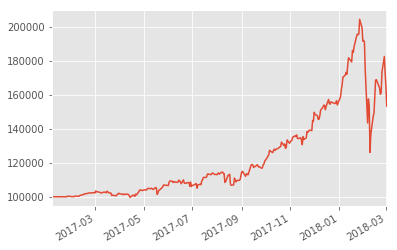

In [28]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

perf.portfolio_value.plot()
plt.show()

In [29]:
perf.columns

Index(['SPY', 'algo_volatility', 'algorithm_period_return', 'alpha',
       'benchmark_period_return', 'benchmark_volatility', 'beta',
       'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
       'excess_return', 'gross_leverage', 'long_exposure', 'long_value',
       'longs_count', 'max_drawdown', 'max_leverage', 'net_leverage', 'orders',
       'period_close', 'period_label', 'period_open', 'pnl', 'portfolio_value',
       'positions', 'returns', 'sharpe', 'short_exposure', 'short_value',
       'shorts_count', 'sortino', 'starting_cash', 'starting_exposure',
       'starting_value', 'trading_days', 'transactions',
       'treasury_period_return'],
      dtype='object')